Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [82]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

# from grader import Grader

In [5]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join('sales_train.csv.gz'))
items           = pd.read_csv(os.path.join('items.csv'))
item_categories = pd.read_csv(os.path.join('item_categories.csv'))
shops           = pd.read_csv(os.path.join('shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [70]:
dataTrans=pd.DataFrame(transactions)
dataItems=pd.DataFrame(items)
dataItems_category=pd.DataFrame(item_categories)
dataShops=pd.DataFrame(shops)

print(dataTrans.shape)
print(dataItems.shape)
print(dataItems_category.shape)
print(dataShops.shape)

dataItems_category.head()

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [98]:
dataItems.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [99]:
dataTrans.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [63]:

total_sales=dataTrans[dataTrans['date'].str.endswith('09.2014')]
total_revenue=(total_sales['item_price']*total_sales['item_cnt_day']).groupby(total_sales['shop_id']).sum().max()
print(total_revenue)

7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [97]:
total_sales=dataTrans[(dataTrans['date'].str.endswith('06.2014')) | (dataTrans['date'].str.endswith('07.2014')) | 
                      (dataTrans['date'].str.endswith('08.2014'))]
total_sales=total_sales[total_sales['item_cnt_day']>0]


total_sales = pd.merge(total_sales, dataItems, how='left', on='item_id')
max_revenue=(total_sales['item_price']*total_sales['item_cnt_day']).groupby(total_sales['item_category_id']).sum().argmax()
print(max_revenue)

20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [103]:
constant_price = (transactions['item_price'].groupby(transactions['item_id']).nunique() == 1).sum()
print(constant_price)

5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 

Variance 113262.11222222223


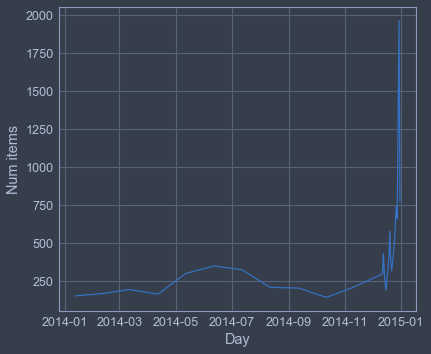

In [135]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
sold_sequence=dataTrans[dataTrans['shop_id']==25]
sold_sequence=sold_sequence[sold_sequence['date'].str.endswith('12.2014')]
sold_sequence=sold_sequence['item_cnt_day'].groupby(sold_sequence['date']).sum()
#print(sold_sequence)
indicies=pd.to_datetime(sold_sequence.index)
values=sold_sequence.values
print("Variance", np.var(sold_sequence.values))

plt.plot(indicies, values)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.show()